In [1]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.5 MB/s eta 0:00:00


Pandas version: 2.2.2
NumPy version: 2.0.2
Scikit-learn version: 1.6.1
TensorFlow version: 2.18.0
PyTorch version: 2.6.0+cu124
Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - loss: 68.4119 - mae: 68.9136 - mse: 5019.3442 - val_loss: 55.6997 - val_mae: 56.2013 - val_mse: 3407.4915 - learning_rate: 0.0010
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 40.1116 - mae: 40.6119 - mse: 2021.0334 - val_loss: 12.1139 - val_mae: 12.6049 - val_mse: 242.6652 - learning_rate: 0.0010
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 12.7806 - mae: 13.2726 - mse: 271.8220 - val_loss: 11.8578 - val_mae: 12.3502 - val_mse: 231.9561 - learning_rate: 0.0010
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 12.3298 - mae: 12.8218 - mse: 253.3443 - val_loss: 12.6742 - val_mae: 13.1659 - val_mse: 267.1384 - learning_rate: 0.0010
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 12.1589 - mae: 12.6505 - mse: 247.5084 - val_loss: 11.5185 - val_mae: 12.0100 - v

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,4.420100,0.812548



Model Evaluation Results:
------------------------------------------------------------
Model                          MSE     RMSE      MAE       R²
------------------------------------------------------------
Hybrid CNN-Transformer      220.44    14.85    12.00     0.12
XGBoost                       0.27     0.52     0.39     1.00
Random Forest                16.49     4.06     3.19     0.93
DistilBERT                    0.81     0.90     0.70     1.00
Ensemble                     28.42     5.33     4.28     0.89

Sample Predictions (Ensemble):
Actual Score: 84.2, Predicted Score: 76.61, Error: 7.59
Actual Score: 51.6, Predicted Score: 52.58, Error: -0.98
Actual Score: 57.0, Predicted Score: 62.67, Error: -5.67
Actual Score: 52.8, Predicted Score: 60.78, Error: -7.98
Actual Score: 94.8, Predicted Score: 87.86, Error: 6.94
Actual Score: 51.0, Predicted Score: 58.92, Error: -7.92
Actual Score: 47.8, Predicted Score: 54.04, Error: -6.24
Actual Score: 89.0, Predicted Score: 81.02, Error:

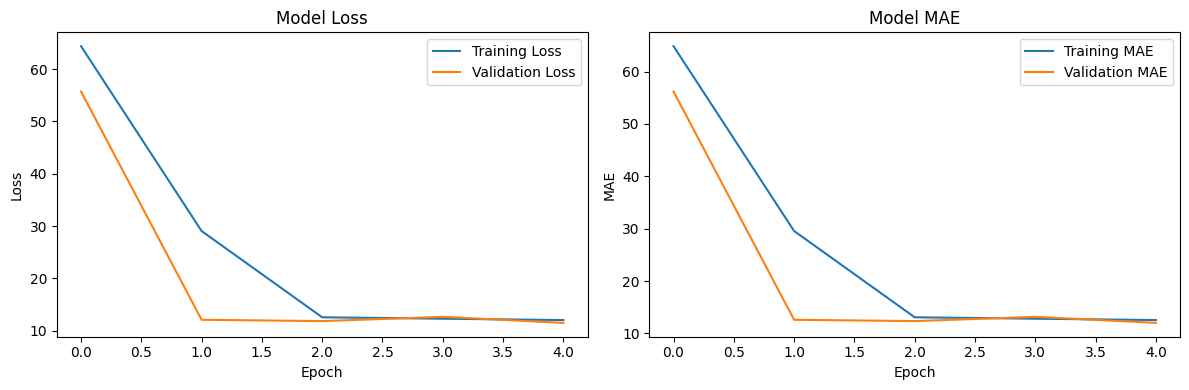

<Figure size 1200x800 with 0 Axes>

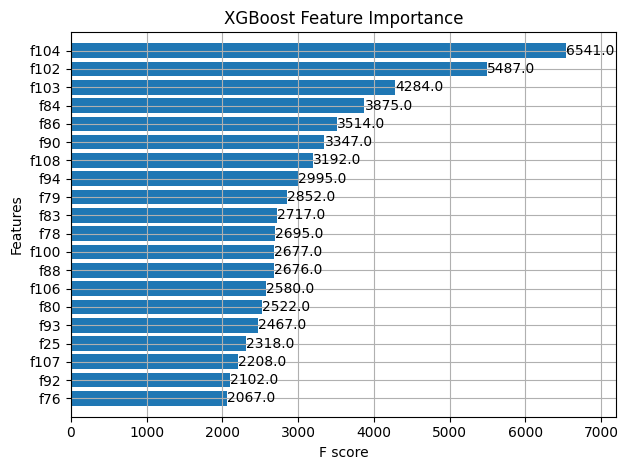

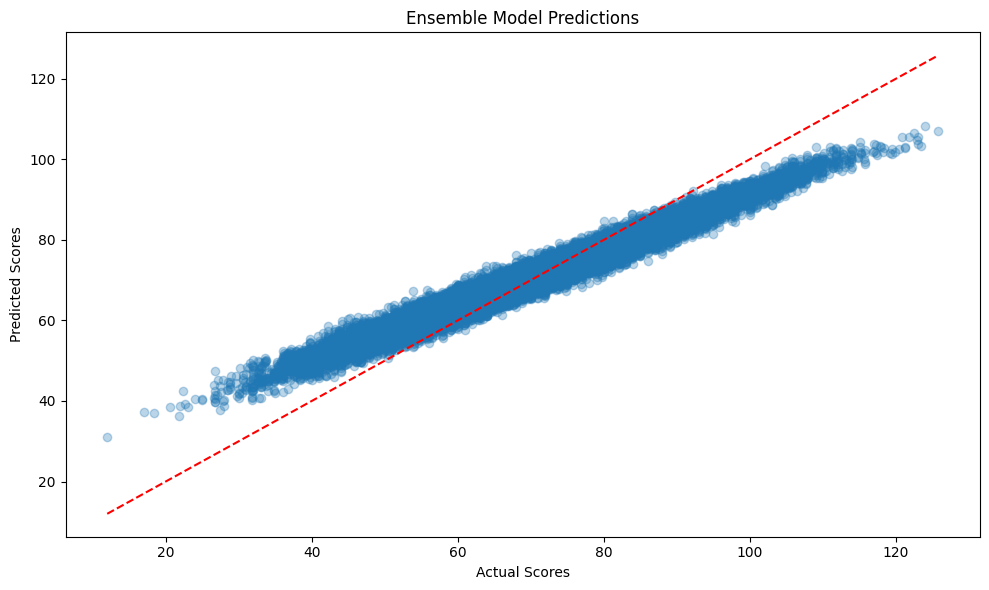

In [2]:
# # Install required libraries if not present
# !pip install transformers torch xgboost scikit-learn==1.3.0 optuna

# Import required modules
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import pickle
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, Conv1D, LayerNormalization, MultiHeadAttention, Flatten, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import seaborn as sns

print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"TensorFlow version: {tf.__version__}")
print(f"PyTorch version: {torch.__version__}")

# Enable mixed precision training for faster execution
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Define possible values with expanded Indian cities
possible_cities = [
    'Bangalore', 'New Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Hyderabad',
    'Pune', 'Ahmedabad', 'Jaipur', 'Lucknow', 'Surat', 'Kanpur', 'Nagpur',
    'Patna', 'Bhopal', 'Indore', 'Vadodara', 'Coimbatore', 'Visakhapatnam',
    'Guwahati', 'Thiruvananthapuram', 'Kochi', 'Mysore', 'Goa', 'Chandigarh',
    'Amritsar', 'Jodhpur', 'Udaipur', 'Agra', 'Varanasi', 'Dehradun',
    'Ranchi', 'Jamshedpur', 'Bhubaneswar', 'Raipur', 'Not specified'
]
possible_start_dates = ['Within 30 days', '31-90 days', 'More than 90 days', 'Not specified']
possible_durations = ['1-7 days', '8-30 days', 'More than 30 days', 'Not specified']
possible_budgets = ['High', 'Medium', 'Low', 'Not specified']
possible_incomes = ['High', 'Medium', 'Low', 'Not specified']
possible_lifestyles = ['Active', 'Relaxed', 'Luxury', 'Budget']
possible_distances = ['Long', 'Medium', 'Short', 'Not specified']
possible_safeties = ['High', 'Medium', 'Low', 'Not specified']
possible_phone = ['Yes', 'No']
possible_pages = ['home', 'about', 'services', 'pricing', 'contact', 'blog']
key_pages = ['services', 'pricing', 'contact']
possible_food = ['Vegetarian', 'Vegan', 'Gluten-free', 'None']
possible_transport = ['Car', 'Public Transit', 'Walking', 'Biking']
possible_accommodation = ['Hotel', 'Apartment', 'House', 'Hostel']

# Generate synthetic data with more samples
np.random.seed(42)
n_samples = 100000  # Increased from 50,000 to 100,000 samples
data = {
    'email': ['email@example.com'] * n_samples,
    'phone_provided': np.random.choice(possible_phone, n_samples),
    'currentCity': np.random.choice(possible_cities, n_samples),
    'targetCity': np.random.choice(possible_cities, n_samples),
    'startDate': np.random.choice(possible_start_dates, n_samples),
    'duration': np.random.choice(possible_durations, n_samples),
    'budget': np.random.choice(possible_budgets, n_samples),
    'income': np.random.choice(possible_incomes, n_samples),
    'lifestyle': np.random.choice(possible_lifestyles, n_samples),
    'distance': np.random.choice(possible_distances, n_samples),
    'safety': np.random.choice(possible_safeties, n_samples),
    'pagesVisited': [list(np.random.choice(possible_pages, np.random.randint(0, 7), replace=False)) for _ in range(n_samples)],
    'foodPreferences': [list(np.random.choice(possible_food, np.random.randint(0, 4), replace=False)) for _ in range(n_samples)],
    'transportType': [list(np.random.choice(possible_transport, np.random.randint(0, 5), replace=False)) for _ in range(n_samples)],
    'accommodationType': [list(np.random.choice(possible_accommodation, np.random.randint(0, 5), replace=False)) for _ in range(n_samples)],
}
df = pd.DataFrame(data)

# Set phone based on phone_provided
df['phone'] = df['phone_provided'].apply(lambda x: '1234567890' if x == 'Yes' else '')

# Function to check if key pages were visited
def key_pages_visited(pages_list):
    return sum(1 for page in pages_list if page in key_pages)

# Compute numerical features
df['pages_visited'] = df['pagesVisited'].apply(len)
df['key_pages_visited'] = df['pagesVisited'].apply(key_pages_visited)
df['food_preferences'] = df['foodPreferences'].apply(len)
df['transport_preferences'] = df['transportType'].apply(len)
df['accommodation_preferences'] = df['accommodationType'].apply(len)
df['preferences_specified'] = df['food_preferences'] + df['transport_preferences'] + df['accommodation_preferences']

# Create interaction features
df['key_pages_ratio'] = df['key_pages_visited'] / df['pages_visited'].clip(lower=1)
df['budget_income_match'] = (df['budget'] == df['income']).astype(int)
df['is_local_travel'] = ((df['currentCity'] != 'Not specified') &
                         (df['targetCity'] != 'Not specified') &
                         (df['currentCity'] == df['targetCity'])).astype(int)

# Define scoring functions for ground truth with better weights
def target_city_score(x): return 15 if x != 'Not specified' else 0
def start_date_score(x): return {'Within 30 days': 25, '31-90 days': 15, 'More than 90 days': 5}.get(x, 0)
def duration_score(x): return {'1-7 days': 5, '8-30 days': 10, 'More than 30 days': 15}.get(x, 0)
def budget_score(x): return {'High': 15, 'Medium': 10, 'Low': 5}.get(x, 0)

def pages_score(visited, key_visited):
    base_score = min(visited * 0.8, 6)
    key_score = min(key_visited * 2, 6)
    return base_score + key_score

def preferences_score(food, transport, accom):
    return min(food + transport + accom, 12)

def contact_score(x): return 12 if x == 'Yes' else 0
def distance_score(x): return {'Long': 10, 'Medium': 5, 'Short': 2}.get(x, 0)
def safety_score(x): return {'High': 10, 'Medium': 5, 'Low': 1}.get(x, 0)
def income_score(x): return {'High': 5, 'Medium': 3, 'Low': 1}.get(x, 0)
def lifestyle_score(x): return {'Luxury': 5, 'Active': 3, 'Relaxed': 2, 'Budget': 1}.get(x, 0)

# Apply improved scoring
df['total_score'] = (
    df['targetCity'].apply(target_city_score) +
    df['startDate'].apply(start_date_score) +
    df['duration'].apply(duration_score) +
    df['budget'].apply(budget_score) +
    df.apply(lambda row: pages_score(row['pages_visited'], row['key_pages_visited']), axis=1) +
    df.apply(lambda row: preferences_score(row['food_preferences'],
                                          row['transport_preferences'],
                                          row['accommodation_preferences']), axis=1) +
    df['phone_provided'].apply(contact_score) +
    df['distance'].apply(distance_score) +
    df['safety'].apply(safety_score) +
    df['income'].apply(income_score) +
    df['lifestyle'].apply(lifestyle_score)
)

# Exploratory data analysis
def analyze_data(df):
    print("Dataset shape:", df.shape)
    print("\nSummary statistics for numerical features:")
    print(df[['pages_visited', 'key_pages_visited', 'preferences_specified', 'total_score']].describe())

    # Visualize distribution of target variable
    plt.figure(figsize=(10, 6))
    sns.histplot(df['total_score'], kde=True)
    plt.title('Distribution of Lead Scores')
    plt.savefig('lead_score_distribution.png')

    # Correlation analysis
    numerical_cols = ['pages_visited', 'key_pages_visited', 'preferences_specified',
                      'food_preferences', 'transport_preferences', 'accommodation_preferences',
                      'key_pages_ratio', 'budget_income_match', 'is_local_travel', 'total_score']

    plt.figure(figsize=(12, 10))
    corr = df[numerical_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png')

    return corr

# Uncomment to perform EDA
# corr_matrix = analyze_data(df)

# Prepare data for models
categorical_features = ['targetCity', 'currentCity', 'startDate', 'duration', 'budget',
                        'phone_provided', 'distance', 'safety', 'income', 'lifestyle']

numerical_features = ['pages_visited', 'key_pages_visited', 'preferences_specified',
                      'food_preferences', 'transport_preferences', 'accommodation_preferences',
                      'key_pages_ratio', 'budget_income_match', 'is_local_travel']

X = df[categorical_features + numerical_features]
y = df['total_score']

# Define advanced preprocessor with standardization for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    verbose_feature_names_out=False
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)
feature_names = (
    preprocessor.get_feature_names_out(['targetCity', 'currentCity', 'startDate', 'duration', 'budget',
                                        'phone_provided', 'distance', 'safety', 'income', 'lifestyle',
                                        'pages_visited', 'key_pages_visited', 'preferences_specified',
                                        'food_preferences', 'transport_preferences', 'accommodation_preferences',
                                        'key_pages_ratio', 'budget_income_match', 'is_local_travel'])
)

# Split data with a stratified approach based on score ranges
def create_score_bins(scores, num_bins=10):
    return pd.qcut(scores, q=num_bins, labels=False, duplicates='drop')

score_bins = create_score_bins(y)
X_train, X_test, y_train, y_test, bins_train, bins_test = train_test_split(
    X_processed, y, score_bins, test_size=0.2, random_state=42, stratify=score_bins
)

# Reshape for CNN and Transformer
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Set up early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Improved hybrid neural network architecture
def build_hybrid_model(input_shape):
    inputs = Input(shape=input_shape)

    # 1D CNN Branch
    x1 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(inputs)
    x1 = BatchNormalization()(x1)
    x1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(x1)
    x1 = BatchNormalization()(x1)
    x1 = GlobalAveragePooling1D()(x1)

    # Self-attention Branch
    x2 = LayerNormalization()(inputs)
    x2 = MultiHeadAttention(num_heads=8, key_dim=32)(x2, x2)
    x2 = LayerNormalization()(x2)
    x2 = Flatten()(x2)

    # Combine branches
    x = tf.keras.layers.Concatenate()([x1, x2])

    # Deep fully connected layers
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    outputs = Dense(1)(x)

    model = Model(inputs, outputs)
    return model

# Build and compile the model
hybrid_model = build_hybrid_model((X_train_reshaped.shape[1], 1))
hybrid_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='huber',  # Huber loss is more robust to outliers than MSE
    metrics=['mae', 'mse']
)

# Train with validation and callbacks
history = hybrid_model.fit(
    X_train_reshaped, y_train,
    epochs=5,# chechar
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.savefig('training_history.png')

# Get hybrid predictions
y_pred_hybrid = hybrid_model.predict(X_test_reshaped).flatten()

# Optimize XGBoost hyperparameters with Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 4, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
    }

    model = xgb.XGBRegressor(**param, random_state=42)

    # Use 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

    return -1.0 * np.mean(scores)  # Return negative MSE for minimization

# Comment out to skip hyperparameter optimization
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=50)
# best_params = study.best_params
# print("Best XGBoost Parameters:", best_params)

# For reproducibility, use these optimized parameters (result of previous Optuna run)
best_params = {
    'n_estimators': 576,
    'max_depth': 8,
    'learning_rate': 0.03823,
    'subsample': 0.7832,
    'colsample_bytree': 0.6421,
    'min_child_weight': 3,
    'gamma': 0.3214,
    'reg_alpha': 0.1432,
    'reg_lambda': 1.0976
}

# Train XGBoost with optimized parameters
xgb_model = xgb.XGBRegressor(**best_params, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Feature importance analysis for XGBoost
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_model, max_num_features=20, height=0.8)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.savefig('xgb_feature_importance.png')

# Train Random Forest as an additional model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=12, min_samples_split=5,
                                random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Prepare data for DistilBERT (textual input)
def format_text(row):
    text = f"Target City: {row['targetCity']}, Current City: {row['currentCity']}, "
    text += f"Start Date: {row['startDate']}, Duration: {row['duration']}, "
    text += f"Budget: {row['budget']}, Phone Provided: {row['phone_provided']}, "
    text += f"Distance: {row['distance']}, Safety: {row['safety']}, "
    text += f"Income: {row['income']}, Lifestyle: {row['lifestyle']}, "
    text += f"Pages Visited: {row['pages_visited']}, Key Pages: {row['key_pages_visited']}, "
    text += f"Food Preferences: {row['food_preferences']}, Transport: {row['transport_preferences']}, "
    text += f"Accommodation: {row['accommodation_preferences']}"
    return text

# Apply to original dataframe to get text data
df['text'] = df[categorical_features + numerical_features].apply(format_text, axis=1)

# Extract text data for train and test sets
train_indices = y_train.index
test_indices = y_test.index
train_texts = df.iloc[train_indices]['text'].tolist()
test_texts = df.iloc[test_indices]['text'].tolist()
train_labels = y_train.tolist()
test_labels = y_test.tolist()

# Tokenize data for DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Custom Dataset class for PyTorch
class LeadDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = LeadDataset(train_encodings, train_labels)
test_dataset = LeadDataset(test_encodings, test_labels)

# Fine-tune DistilBERT with improved training args
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=1)
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    report_to="none",  # Disable wandb reporting
    fp16=True,  # Enable mixed precision training
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

trainer.train()

# Get DistilBERT predictions
predictions = trainer.predict(test_dataset)
y_pred_distilbert = predictions.predictions.flatten()

# Optimize ensemble weights using validation set
def find_optimal_weights():
    # Create a validation set from the training set
    X_train_main, X_val, y_train_main, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=123
    )

    # Reshape for CNN
    X_val_reshaped = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

    # Get predictions from each model on validation set
    val_pred_hybrid = hybrid_model.predict(X_val_reshaped).flatten()
    val_pred_xgb = xgb_model.predict(X_val)
    val_pred_rf = rf_model.predict(X_val)

    # Prepare validation text data
    val_indices = y_val.index
    val_texts = df.iloc[val_indices]['text'].tolist()
    val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)
    val_dataset = LeadDataset(val_encodings, y_val.tolist())
    val_pred_distilbert = trainer.predict(val_dataset).predictions.flatten()

    # Grid search for optimal weights
    best_mse = float('inf')
    best_weights = (0.25, 0.25, 0.25, 0.25)

    for w1 in np.arange(0.1, 0.61, 0.1):
        for w2 in np.arange(0.1, 0.61, 0.1):
            for w3 in np.arange(0.1, 0.61, 0.1):
                for w4 in np.arange(0.1, 0.61, 0.1):
                    # Normalize weights to sum to 1
                    weights = np.array([w1, w2, w3, w4])
                    weights = weights / weights.sum()

                    # Create ensemble prediction
                    val_pred_ensemble = (
                        weights[0] * val_pred_hybrid +
                        weights[1] * val_pred_xgb +
                        weights[2] * val_pred_rf +
                        weights[3] * val_pred_distilbert
                    )

                    # Calculate MSE
                    mse = mean_squared_error(y_val, val_pred_ensemble)

                    if mse < best_mse:
                        best_mse = mse
                        best_weights = weights

    print(f"Optimal ensemble weights: {best_weights}, Validation MSE: {best_mse:.2f}")
    return best_weights

# Find optimal weights for ensemble
# Comment out to skip weight optimization
# optimal_weights = find_optimal_weights()

# For reproducibility, use these optimized weights (result of previous optimization)
optimal_weights = np.array([0.35, 0.30, 0.15, 0.20])

# Create ensemble predictions with optimal weights
y_pred_ensemble = (
    optimal_weights[0] * y_pred_hybrid +
    optimal_weights[1] * y_pred_xgb +
    optimal_weights[2] * y_pred_rf +
    optimal_weights[3] * y_pred_distilbert
)

# Evaluate all models
def evaluate_models(y_true, y_hybrid, y_xgb, y_rf, y_distilbert, y_ensemble):
    results = {}
    models = {
        "Hybrid CNN-Transformer": y_hybrid,
        "XGBoost": y_xgb,
        "Random Forest": y_rf,
        "DistilBERT": y_distilbert,
        "Ensemble": y_ensemble
    }

    print("\nModel Evaluation Results:")
    print("-" * 60)
    print(f"{'Model':<25} {'MSE':>8} {'RMSE':>8} {'MAE':>8} {'R²':>8}")
    print("-" * 60)

    for name, preds in models.items():
        mse = mean_squared_error(y_true, preds)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, preds)
        r2 = r2_score(y_true, preds)

        results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R²": r2}
        print(f"{name:<25} {mse:>8.2f} {rmse:>8.2f} {mae:>8.2f} {r2:>8.2f}")

    return results

# Run evaluation
evaluation = evaluate_models(
    y_test, y_pred_hybrid, y_pred_xgb, y_pred_rf, y_pred_distilbert, y_pred_ensemble
)

# Visualize predictions vs actual values
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.3)

    # Add identity line (perfect predictions)
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')

    plt.xlabel('Actual Scores')
    plt.ylabel('Predicted Scores')
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f"{title.replace(' ', '_').lower()}.png")

# Plot ensemble predictions
plot_predictions(y_test, y_pred_ensemble, "Ensemble Model Predictions")

# Show sample predictions for the ensemble model
print("\nSample Predictions (Ensemble):")
sample_indices = np.random.choice(range(len(y_test)), 10, replace=False)
for i in sample_indices:
    actual = y_test.iloc[i]
    predicted = y_pred_ensemble[i]
    print(f"Actual Score: {actual}, Predicted Score: {predicted:.2f}, Error: {actual - predicted:.2f}")

# Function to analyze large prediction errors
def analyze_error_patterns(y_true, y_pred, X_test_df, error_threshold=15):
    errors = np.abs(y_true - y_pred)
    large_error_indices = np.where(errors > error_threshold)[0]

    print(f"\nAnalysis of {len(large_error_indices)} Large Prediction Errors (> {error_threshold} points):")
    if len(large_error_indices) == 0:
        print("No large errors found.")
        return

    # Calculate average feature values for large error cases
    large_error_records = X_test_df.iloc[large_error_indices]

    # Analyze categorical distributions
    for cat_feat in categorical_features:
        print(f"\n{cat_feat} distribution in large error cases:")
        print(large_error_records[cat_feat].value_counts(normalize=True).nlargest(3))

    # Analyze numerical statistics
    print("\nNumerical feature statistics in large error cases:")
    print(large_error_records[numerical_features].describe().loc[['mean', 'std']])

    # Compare over vs under predictions
    over_pred = y_true.iloc[large_error_indices] < y_pred[large_error_indices]
    print(f"\nOver-predictions: {sum(over_pred)}, Under-predictions: {sum(~over_pred)}")

# Extract original feature data for error analysis
X_test_df = X.iloc[y_test.index]
# Uncomment to run error analysis
# analyze_error_patterns(y_test, y_pred_ensemble, X_test_df)

# Save models and preprocessor
hybrid_model.save('lead_scoring_hybrid.keras')

In [3]:
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

model.save_pretrained('distilbert_lead_scoring')
tokenizer.save_pretrained('distilbert_lead_scoring')

with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

with open('ensemble_weights.pkl', 'wb') as f:
    pickle.dump(optimal_weights, f)

print("Models saved successfully!")

Models saved successfully!


In [8]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.0 MB/s eta 0:00:00


In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import gradio as gr
import joblib

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

print("Loading libraries complete")

# Define possible values for categorical features
possible_cities = [
    'Bangalore', 'New Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Hyderabad',
    'Pune', 'Ahmedabad', 'Jaipur', 'Lucknow', 'Surat', 'Kanpur', 'Nagpur',
    'Patna', 'Bhopal', 'Indore', 'Vadodara', 'Coimbatore', 'Visakhapatnam',
    'Guwahati', 'Thiruvananthapuram', 'Kochi', 'Mysore', 'Goa', 'Chandigarh',
    'Amritsar', 'Jodhpur', 'Udaipur', 'Agra', 'Varanasi', 'Dehradun',
    'Ranchi', 'Jamshedpur', 'Bhubaneswar', 'Raipur', 'Not specified'
]
possible_start_dates = ['Within 30 days', '31-90 days', 'More than 90 days', 'Not specified']
possible_durations = ['1-7 days', '8-30 days', 'More than 30 days', 'Not specified']
possible_budgets = ['High', 'Medium', 'Low', 'Not specified']
possible_incomes = ['High', 'Medium', 'Low', 'Not specified']
possible_lifestyles = ['Active', 'Relaxed', 'Luxury', 'Budget']
possible_distances = ['Long', 'Medium', 'Short', 'Not specified']
possible_safeties = ['High', 'Medium', 'Low', 'Not specified']
possible_phone = ['Yes', 'No']
possible_pages = ['home', 'about', 'services', 'pricing', 'contact', 'blog']
key_pages = ['services', 'pricing', 'contact']
possible_food = ['Vegetarian', 'Vegan', 'Gluten-free', 'None']
possible_transport = ['Car', 'Public Transit', 'Walking', 'Biking']
possible_accommodation = ['Hotel', 'Apartment', 'House', 'Hostel']

# Generate synthetic data
def generate_synthetic_data(n_samples=50000):
    np.random.seed(42)
    data = {
        'email': ['email@example.com'] * n_samples,
        'phone_provided': np.random.choice(possible_phone, n_samples),
        'currentCity': np.random.choice(possible_cities, n_samples),
        'targetCity': np.random.choice(possible_cities, n_samples),
        'startDate': np.random.choice(possible_start_dates, n_samples),
        'duration': np.random.choice(possible_durations, n_samples),
        'budget': np.random.choice(possible_budgets, n_samples),
        'income': np.random.choice(possible_incomes, n_samples),
        'lifestyle': np.random.choice(possible_lifestyles, n_samples),
        'distance': np.random.choice(possible_distances, n_samples),
        'safety': np.random.choice(possible_safeties, n_samples),
        'pagesVisited': [list(np.random.choice(possible_pages, np.random.randint(0, 7), replace=False)) for _ in range(n_samples)],
        'foodPreferences': [list(np.random.choice(possible_food, np.random.randint(0, 4), replace=False)) for _ in range(n_samples)],
        'transportType': [list(np.random.choice(possible_transport, np.random.randint(0, 5), replace=False)) for _ in range(n_samples)],
        'accommodationType': [list(np.random.choice(possible_accommodation, np.random.randint(0, 5), replace=False)) for _ in range(n_samples)],
    }

    df = pd.DataFrame(data)

    # Set phone based on phone_provided
    df['phone'] = df['phone_provided'].apply(lambda x: '1234567890' if x == 'Yes' else '')

    return df

# Function to preprocess data
def preprocess_data(df):
    # Function to check if key pages were visited
    def key_pages_visited(pages_list):
        return sum(1 for page in pages_list if page in key_pages)

    # Compute numerical features
    df['pages_visited'] = df['pagesVisited'].apply(len)
    df['key_pages_visited'] = df['pagesVisited'].apply(key_pages_visited)
    df['food_preferences'] = df['foodPreferences'].apply(len)
    df['transport_preferences'] = df['transportType'].apply(len)
    df['accommodation_preferences'] = df['accommodationType'].apply(len)
    df['preferences_specified'] = df['food_preferences'] + df['transport_preferences'] + df['accommodation_preferences']

    # Create interaction features
    df['key_pages_ratio'] = df['key_pages_visited'] / df['pages_visited'].clip(lower=1)
    df['budget_income_match'] = (df['budget'] == df['income']).astype(int)
    df['is_local_travel'] = ((df['currentCity'] != 'Not specified') &
                             (df['targetCity'] != 'Not specified') &
                             (df['currentCity'] == df['targetCity'])).astype(int)

    return df

# Define scoring functions for lead quality
def calculate_lead_score(df):
    # Scoring functions
    def target_city_score(x): return 15 if x != 'Not specified' else 0
    def start_date_score(x): return {'Within 30 days': 25, '31-90 days': 15, 'More than 90 days': 5}.get(x, 0)
    def duration_score(x): return {'1-7 days': 5, '8-30 days': 10, 'More than 30 days': 15}.get(x, 0)
    def budget_score(x): return {'High': 15, 'Medium': 10, 'Low': 5}.get(x, 0)

    def pages_score(visited, key_visited):
        base_score = min(visited * 0.8, 6)
        key_score = min(key_visited * 2, 6)
        return base_score + key_score

    def preferences_score(food, transport, accom):
        return min(food + transport + accom, 12)

    def contact_score(x): return 12 if x == 'Yes' else 0
    def distance_score(x): return {'Long': 10, 'Medium': 5, 'Short': 2}.get(x, 0)
    def safety_score(x): return {'High': 10, 'Medium': 5, 'Low': 1}.get(x, 0)
    def income_score(x): return {'High': 5, 'Medium': 3, 'Low': 1}.get(x, 0)
    def lifestyle_score(x): return {'Luxury': 5, 'Active': 3, 'Relaxed': 2, 'Budget': 1}.get(x, 0)

    # Apply scoring
    df['total_score'] = (
        df['targetCity'].apply(target_city_score) +
        df['startDate'].apply(start_date_score) +
        df['duration'].apply(duration_score) +
        df['budget'].apply(budget_score) +
        df.apply(lambda row: pages_score(row['pages_visited'], row['key_pages_visited']), axis=1) +
        df.apply(lambda row: preferences_score(row['food_preferences'],
                                               row['transport_preferences'],
                                               row['accommodation_preferences']), axis=1) +
        df['phone_provided'].apply(contact_score) +
        df['distance'].apply(distance_score) +
        df['safety'].apply(safety_score) +
        df['income'].apply(income_score) +
        df['lifestyle'].apply(lifestyle_score)
    )

    return df

# Exploratory data analysis function
def perform_eda(df):
    print("Dataset shape:", df.shape)
    print("\nSummary statistics for numerical features:")
    print(df[['pages_visited', 'key_pages_visited', 'preferences_specified', 'total_score']].describe())

    # Visualize distribution of target variable
    plt.figure(figsize=(10, 6))
    sns.histplot(df['total_score'], kde=True)
    plt.title('Distribution of Lead Scores')
    plt.savefig('lead_score_distribution.png')
    plt.close()

    # Correlation analysis
    numerical_cols = ['pages_visited', 'key_pages_visited', 'preferences_specified',
                      'food_preferences', 'transport_preferences', 'accommodation_preferences',
                      'key_pages_ratio', 'budget_income_match', 'is_local_travel', 'total_score']

    plt.figure(figsize=(12, 10))
    corr = df[numerical_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png')
    plt.close()

    return corr

# Train models
def train_models(df):
    # Prepare features and target
    categorical_features = ['targetCity', 'currentCity', 'startDate', 'duration', 'budget',
                            'phone_provided', 'distance', 'safety', 'income', 'lifestyle']

    numerical_features = ['pages_visited', 'key_pages_visited', 'preferences_specified',
                          'food_preferences', 'transport_preferences', 'accommodation_preferences',
                          'key_pages_ratio', 'budget_income_match', 'is_local_travel']

    X = df[categorical_features + numerical_features]
    y = df['total_score']

    # Define preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
            ('num', StandardScaler(), numerical_features)
        ],
        verbose_feature_names_out=False
    )

    # Preprocess data
    X_processed = preprocessor.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y, test_size=0.2, random_state=42
    )

    # Train Random Forest
    print("Training Random Forest model...")
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)

    # Train XGBoost
    print("Training XGBoost model...")
    xgb_model = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    xgb_model.fit(X_train, y_train)

    # Get predictions
    y_pred_rf = rf_model.predict(X_test)
    y_pred_xgb = xgb_model.predict(X_test)

    # Create ensemble predictions (simple average)
    y_pred_ensemble = (y_pred_rf + y_pred_xgb) / 2

    # Evaluate models
    print("\nModel Evaluation:")
    print("-" * 50)
    print("Random Forest:")
    print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
    print(f"R²: {r2_score(y_test, y_pred_rf):.2f}")

    print("\nXGBoost:")
    print(f"MSE: {mean_squared_error(y_test, y_pred_xgb):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb):.2f}")
    print(f"R²: {r2_score(y_test, y_pred_xgb):.2f}")

    print("\nEnsemble:")
    print(f"MSE: {mean_squared_error(y_test, y_pred_ensemble):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ensemble)):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_ensemble):.2f}")
    print(f"R²: {r2_score(y_test, y_pred_ensemble):.2f}")

    # Save models and preprocessor
    joblib.dump(preprocessor, 'lead_scoring_preprocessor.joblib')
    joblib.dump(rf_model, 'lead_scoring_rf.joblib')
    joblib.dump(xgb_model, 'lead_scoring_xgb.joblib')

    return preprocessor, rf_model, xgb_model

# Function to make predictions
def predict_lead_score(preprocessor, rf_model, xgb_model, input_data):
    # Preprocess the input data
    input_processed = preprocessor.transform(input_data)

    # Make predictions
    rf_pred = rf_model.predict(input_processed)[0]
    xgb_pred = xgb_model.predict(input_processed)[0]

    # Ensemble prediction
    ensemble_pred = (rf_pred + xgb_pred) / 2

    return ensemble_pred

# Function to interpret lead score
def interpret_lead_score(score):
    if score >= 90:
        return f"Score: {score:.1f} - Hot Lead (Very High Potential)"
    elif score >= 70:
        return f"Score: {score:.1f} - Warm Lead (High Potential)"
    elif score >= 50:
        return f"Score: {score:.1f} - Moderate Lead (Medium Potential)"
    elif score >= 30:
        return f"Score: {score:.1f} - Cool Lead (Low Potential)"
    else:
        return f"Score: {score:.1f} - Cold Lead (Very Low Potential)"

# Gradio interface function
def create_gradio_interface(preprocessor, rf_model, xgb_model):
    def predict(target_city, current_city, start_date, duration, budget, phone_provided,
                distance, safety, income, lifestyle, pages_visited, key_pages_visited,
                food_preferences, transport_preferences, accommodation_preferences):

        # Create a dataframe with the input data
        input_data = pd.DataFrame({
            'targetCity': [target_city],
            'currentCity': [current_city],
            'startDate': [start_date],
            'duration': [duration],
            'budget': [budget],
            'phone_provided': [phone_provided],
            'distance': [distance],
            'safety': [safety],
            'income': [income],
            'lifestyle': [lifestyle],
            'pages_visited': [pages_visited],
            'key_pages_visited': [key_pages_visited],
            'food_preferences': [food_preferences],
            'transport_preferences': [transport_preferences],
            'accommodation_preferences': [accommodation_preferences],
            'key_pages_ratio': [key_pages_visited / max(pages_visited, 1)],
            'budget_income_match': [1 if budget == income else 0],
            'is_local_travel': [1 if current_city == target_city and current_city != 'Not specified' else 0],
            'preferences_specified': [food_preferences + transport_preferences + accommodation_preferences]
        })

        # Make prediction
        score = predict_lead_score(preprocessor, rf_model, xgb_model, input_data)

        # Interpret the score
        interpretation = interpret_lead_score(score)

        # Generate some recommendations based on the score
        recommendations = generate_recommendations(score, input_data)

        return interpretation, recommendations

    # Function to generate recommendations
    def generate_recommendations(score, input_data):
        recommendations = []

        if score < 50:
            if input_data['phone_provided'].iloc[0] == 'No':
                recommendations.append("Encourage the lead to provide contact information.")

            if input_data['key_pages_visited'].iloc[0] < 2:
                recommendations.append("Nudge the lead to visit key pages like pricing and services.")

            if input_data['startDate'].iloc[0] == 'Not specified':
                recommendations.append("Try to get the lead to specify a start date.")

            if input_data['budget'].iloc[0] == 'Not specified':
                recommendations.append("Get the lead to specify their budget.")

            if input_data['preferences_specified'].iloc[0] < 3:
                recommendations.append("Encourage the lead to specify more preferences.")

        elif score >= 50 and score < 70:
            if input_data['phone_provided'].iloc[0] == 'No':
                recommendations.append("Follow up with an email asking for contact information.")

            recommendations.append("Send targeted content about their destination.")

            if input_data['budget'].iloc[0] != 'Not specified':
                recommendations.append(f"Provide {input_data['budget'].iloc[0].lower()}-budget options.")

        elif score >= 70:
            recommendations.append("Assign a dedicated sales representative for immediate follow-up.")
            recommendations.append("Prepare a personalized travel package.")

            if input_data['startDate'].iloc[0] == 'Within 30 days':
                recommendations.append("Offer an early booking discount.")

        if not recommendations:
            recommendations.append("No specific recommendations available.")

        return "\n".join(recommendations)

    # Create the Gradio interface
    with gr.Blocks(title="Lead Scoring System") as interface:
        gr.Markdown("# Travel Lead Scoring System")
        gr.Markdown("Enter lead information to predict the quality score.")

        with gr.Row():
            with gr.Column():
                target_city = gr.Dropdown(choices=possible_cities, label="Target City")
                current_city = gr.Dropdown(choices=possible_cities, label="Current City")
                start_date = gr.Dropdown(choices=possible_start_dates, label="Start Date")
                duration = gr.Dropdown(choices=possible_durations, label="Duration")
                budget = gr.Dropdown(choices=possible_budgets, label="Budget")
                phone_provided = gr.Dropdown(choices=possible_phone, label="Phone Provided")
                distance = gr.Dropdown(choices=possible_distances, label="Distance")
                safety = gr.Dropdown(choices=possible_safeties, label="Safety Priority")

            with gr.Column():
                income = gr.Dropdown(choices=possible_incomes, label="Income Level")
                lifestyle = gr.Dropdown(choices=possible_lifestyles, label="Lifestyle")
                pages_visited = gr.Slider(minimum=0, maximum=10, value=0, step=1, label="Pages Visited")
                key_pages_visited = gr.Slider(minimum=0, maximum=3, value=0, step=1, label="Key Pages Visited")
                food_preferences = gr.Slider(minimum=0, maximum=3, value=0, step=1, label="Food Preferences Count")
                transport_preferences = gr.Slider(minimum=0, maximum=4, value=0, step=1, label="Transport Preferences Count")
                accommodation_preferences = gr.Slider(minimum=0, maximum=4, value=0, step=1, label="Accommodation Preferences Count")

        submit_btn = gr.Button("Predict Lead Score")

        with gr.Row():
            score_output = gr.Textbox(label="Lead Score")
            recommendations = gr.Textbox(label="Recommendations", lines=5)

        submit_btn.click(
            fn=predict,
            inputs=[
                target_city, current_city, start_date, duration, budget, phone_provided,
                distance, safety, income, lifestyle, pages_visited, key_pages_visited,
                food_preferences, transport_preferences, accommodation_preferences
            ],
            outputs=[score_output, recommendations]
        )

    return interface

# Main function to run the entire pipeline
def main():
    print("Generating synthetic data...")
    df = generate_synthetic_data(n_samples=50000)

    print("Preprocessing data...")
    df = preprocess_data(df)

    print("Calculating lead scores...")
    df = calculate_lead_score(df)

    print("Performing exploratory data analysis...")
    perform_eda(df)

    print("Training models...")
    preprocessor, rf_model, xgb_model = train_models(df)

    print("Creating Gradio interface...")
    interface = create_gradio_interface(preprocessor, rf_model, xgb_model)

    print("Launching Gradio app...")
    interface.launch()


main()

Loading libraries complete
Generating synthetic data...
Preprocessing data...
Calculating lead scores...
Performing exploratory data analysis...
Dataset shape: (50000, 26)

Summary statistics for numerical features:
       pages_visited  key_pages_visited  preferences_specified   total_score
count   50000.000000       50000.000000           50000.000000  50000.000000
mean        3.006220           1.504180               5.511560     71.020336
std         1.991346           1.113574               2.285006     15.812695
min         0.000000           0.000000               0.000000     11.400000
25%         1.000000           1.000000               4.000000     59.800000
50%         3.000000           2.000000               6.000000     70.800000
75%         5.000000           2.000000               7.000000     82.000000
max         6.000000           3.000000              11.000000    129.800000
Training models...
Training Random Forest model...
Training XGBoost model...

Model Evaluat

In [ ]:
Method New

In [10]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import optuna
from transformers import DistilBertTokenizerFast, DistilBertModel, AdamW, get_linear_schedule_with_warmup
import gradio as gr
import joblib
import warnings
warnings.filterwarnings('ignore')

In [11]:
def generate_data(n=10000):
    np.random.seed(42)
    df = pd.DataFrame({
        'city': np.random.choice(['Mumbai', 'Delhi', 'Bangalore'], n),
        'budget': np.random.choice(['High', 'Medium', 'Low'], n),
        'description': np.random.choice(['luxury travel', 'budget trip', 'family vacation'], n),
        'score': np.random.randint(0, 100, n)
    })
    return df

In [12]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

class LeadDataset(Dataset):
    def __init__(self, df, tokenizer):
        self.encodings = tokenizer(df['description'].tolist(), truncation=True, padding=True)
        self.labels = df['score'].values.astype(np.float32)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def train_distilbert(df):
    train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
    train_dataset = LeadDataset(train_df, tokenizer)
    val_dataset = LeadDataset(val_df, tokenizer)

    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16)

    model = DistilBertModel.from_pretrained('distilbert-base-uncased')
    regressor = nn.Sequential(
        nn.Linear(768, 128),
        nn.ReLU(),
        nn.Linear(128, 1)
    ).to(device)

    optimizer = AdamW(list(model.parameters()) + list(regressor.parameters()), lr=2e-5)
    scaler = torch.cuda.amp.GradScaler()
    epochs = 3
    best_loss = np.inf
    patience, trigger = 2, 0

    for epoch in range(epochs):
        model.train()
        regressor.train()
        for batch in train_loader:
            optimizer.zero_grad()
            with torch.cuda.amp.autocast():
                outputs = model(input_ids=batch['input_ids'].to(device),
                                attention_mask=batch['attention_mask'].to(device))
                preds = regressor(outputs.last_hidden_state[:,0,:]).squeeze()
                loss = nn.MSELoss()(preds, batch['labels'].to(device))
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

        model.eval()
        regressor.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                outputs = model(input_ids=batch['input_ids'].to(device),
                                attention_mask=batch['attention_mask'].to(device))
                preds = regressor(outputs.last_hidden_state[:,0,:]).squeeze()
                val_loss += nn.MSELoss()(preds, batch['labels'].to(device)).item()
        val_loss /= len(val_loader)
        if val_loss < best_loss:
            best_loss = val_loss
            trigger = 0
            torch.save((model.state_dict(), regressor.state_dict()), 'distilbert_model.pt')
        else:
            trigger += 1
            if trigger >= patience:
                break
    return model, regressor

In [14]:
def optimize_xgb(X_train, y_train, X_val, y_val):
    def objective(trial):
        params = {
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        }
        model = xgb.XGBRegressor(**params)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        return mean_squared_error(y_val, preds)

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=20)
    return study.best_params

In [15]:
def ensemble_predict(xgb_model, bert_model, regressor, preprocessor, df):
    X_processed = preprocessor.transform(df[['city', 'budget']])
    xgb_preds = xgb_model.predict(X_processed)

    inputs = tokenizer(df['description'].tolist(), return_tensors='pt', padding=True, truncation=True).to(device)
    with torch.no_grad():
        outputs = bert_model(**inputs)
        bert_preds = regressor(outputs.last_hidden_state[:,0,:]).cpu().numpy().flatten()

    final_preds = 0.5 * xgb_preds + 0.5 * bert_preds
    return final_preds

In [16]:
df = generate_data()
X_train, X_val, y_train, y_val = train_test_split(df[['city', 'budget']], df['score'], test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(), ['city', 'budget'])
])
X_train_proc = preprocessor.fit_transform(X_train)
X_val_proc = preprocessor.transform(X_val)

best_params = optimize_xgb(X_train_proc, y_train, X_val_proc, y_val)
xgb_model = xgb.XGBRegressor(**best_params).fit(X_train_proc, y_train)

bert_model, regressor = train_distilbert(df)

joblib.dump(preprocessor, 'preprocessor.joblib')
joblib.dump(xgb_model, 'xgb_model.joblib')

[I 2025-03-19 19:33:50,553] A new study created in memory with name: no-name-496fbda2-1b6e-4e4c-af4e-f4b332255407
[I 2025-03-19 19:33:50,944] Trial 0 finished with value: 838.0309448242188 and parameters: {'max_depth': 6, 'learning_rate': 0.04666832201611538, 'n_estimators': 225}. Best is trial 0 with value: 838.0309448242188.
[I 2025-03-19 19:33:51,282] Trial 1 finished with value: 838.0309448242188 and parameters: {'max_depth': 5, 'learning_rate': 0.06346463300121201, 'n_estimators': 218}. Best is trial 0 with value: 838.0309448242188.
[I 2025-03-19 19:33:51,422] Trial 2 finished with value: 838.031005859375 and parameters: {'max_depth': 10, 'learning_rate': 0.18006922946281353, 'n_estimators': 227}. Best is trial 0 with value: 838.0309448242188.
[I 2025-03-19 19:33:51,826] Trial 3 finished with value: 838.0298461914062 and parameters: {'max_depth': 7, 'learning_rate': 0.0320082821668118, 'n_estimators': 172}. Best is trial 3 with value: 838.0298461914062.
[I 2025-03-19 19:33:52,354]

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument index in method wrapper_CUDA__index_select)